<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_3_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODULE 3: CLASSIFICATION-1
### LAB-3 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [10]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    predictions = []
    neighbors_and_distances = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            distances.append([np.sqrt(np.sum(np.square(X_test[i, :] - X_train[j, :]))), j])

        distances = sorted(distances)

        k_nearest = []
        k_distances = []
        for l in range(k):
            index = distances[l][1]
            k_nearest.append(y_train[index])
            k_distances.append(distances[l][0])

        neighbors_and_distances.append({'query_point_index': i, 'k_nearest_neighbors_labels': k_nearest, 'distances': k_distances})

    return neighbors_and_distances

# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

In [11]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        # radius = vor.points.ptp().max() # Original line
        radius = np.ptp(vor.points).max() # Corrected line

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

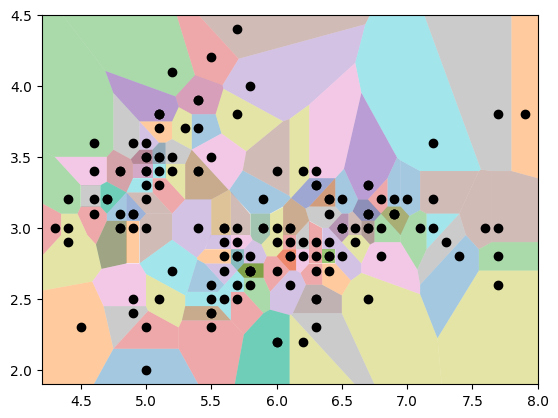

In [12]:
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
points = np.array(points)
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [13]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


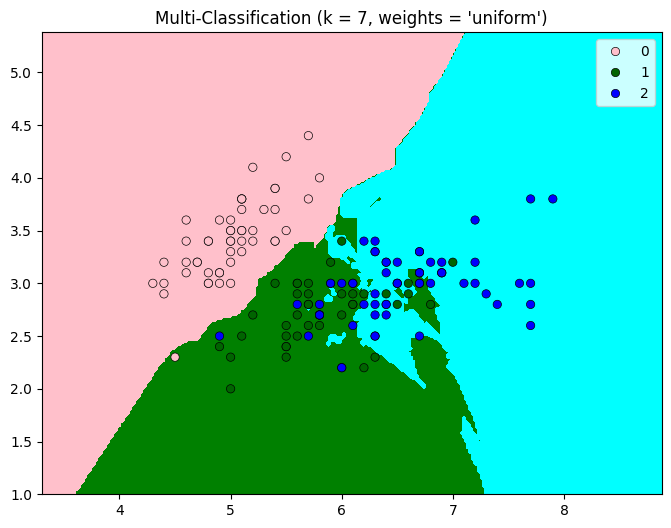

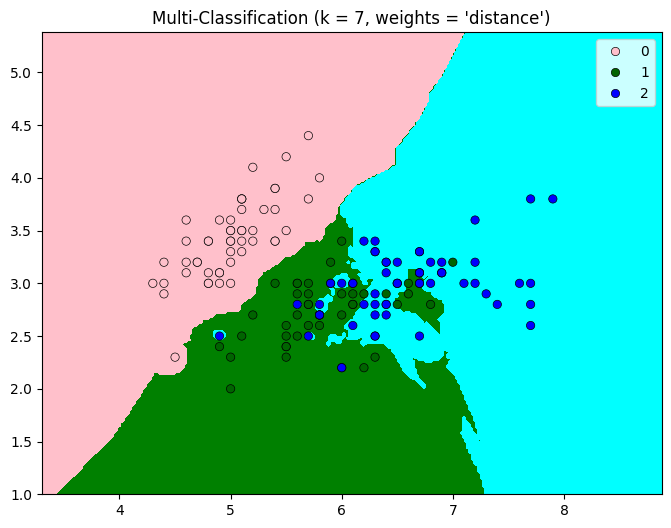

In [14]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

# Task
Apply PCA on the Iris dataset to reduce it to two dimensions. Plot the Voronoi diagram and KNN decision boundaries using the reduced data.

### Apply pca

### Subtask:
Apply PCA to reduce the dimensionality of the Iris dataset to 2 components.


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Visualize voronoi diagram

### Subtask:
Plot the Voronoi diagram using the 2-dimensional data obtained from PCA.


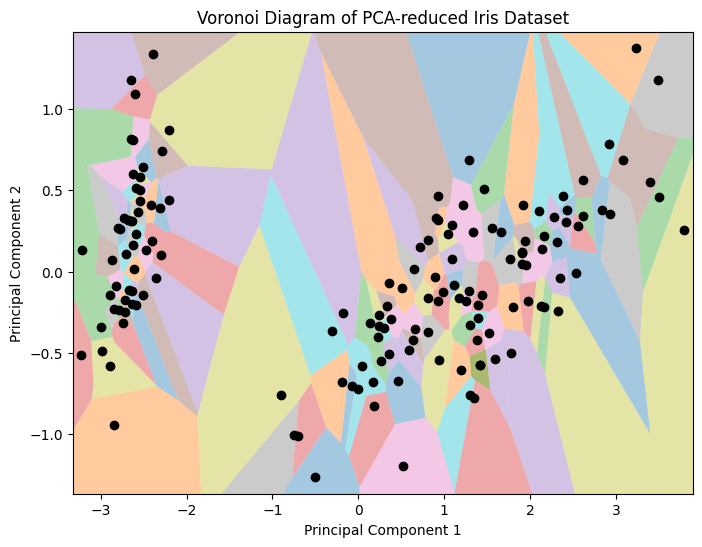

In [16]:
vor_pca = Voronoi(X_pca)

regions_pca, vertices_pca = voronoi_finite_polygons_2d(vor_pca)

plt.figure(figsize=(8, 6))
for region in regions_pca:
    polygon = vertices_pca[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(X_pca[:,0], X_pca[:,1], 'ko')
plt.xlim(vor_pca.min_bound[0] - 0.1, vor_pca.max_bound[0] + 0.1)
plt.ylim(vor_pca.min_bound[1] - 0.1, vor_pca.max_bound[1] + 0.1)
plt.title('Voronoi Diagram of PCA-reduced Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Visualize decision boundaries

### Subtask:
Plot the KNN decision boundaries using the 2-dimensional data obtained from PCA.


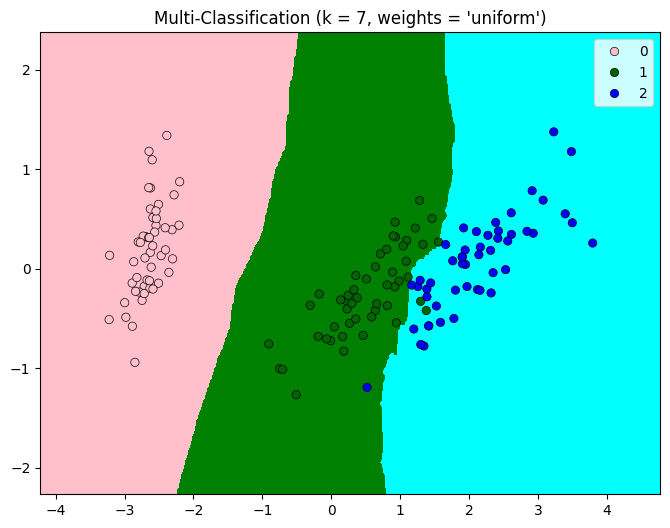

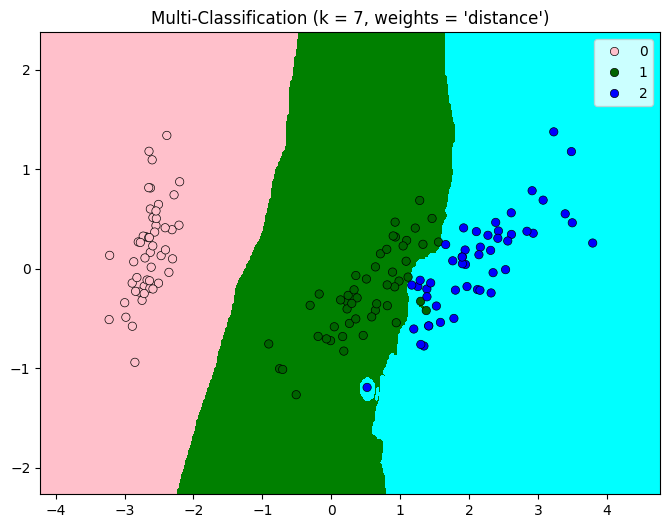

In [17]:
decision_boundary_plot(X_pca, y, 7)

### Data Analysis Key Findings

*   Principal Component Analysis (PCA) was successfully applied to the Iris dataset, reducing its dimensionality to two components.
*   A Voronoi diagram was successfully plotted using the 2-dimensional PCA-reduced data, visually representing the tessellation of the data points.
*   KNN decision boundaries were successfully plotted on the 2-dimensional PCA-reduced data using a k-value of 7, illustrating how a K-Nearest Neighbors model would classify points in this reduced space.

### Insights or Next Steps

*   The visualizations (Voronoi diagram and KNN decision boundaries) in the 2D PCA space provide insights into the separability of the Iris classes after dimensionality reduction. Further analysis could involve evaluating the classification accuracy of a KNN model directly on this reduced dataset.
*   Explore the effect of different k-values on the KNN decision boundaries in the PCA-reduced space to understand how the number of neighbors influences the classification regions.


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [18]:
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

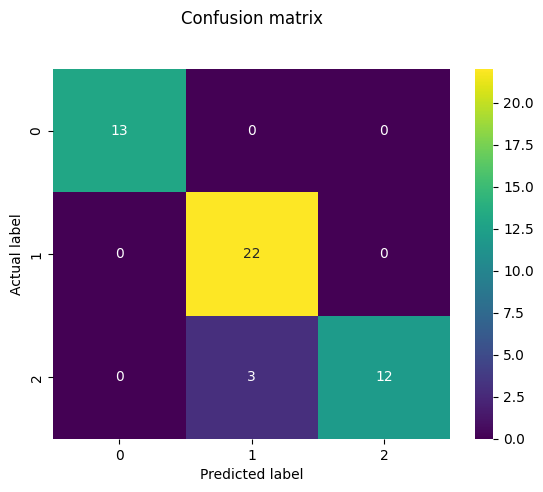

In [19]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



In [21]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [22]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,vhigh,vhigh,2,2,small,high,unacc
1,vhigh,vhigh,2,2,med,low,unacc
2,vhigh,vhigh,2,2,med,med,unacc
3,vhigh,vhigh,2,2,med,high,unacc
4,vhigh,vhigh,2,2,big,low,unacc
...,...,...,...,...,...,...,...
1721,low,low,5,5,med,med,good
1722,low,low,5,5,med,high,vgood
1723,low,low,5,5,big,low,unacc
1724,low,low,5,5,big,med,good


In [23]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,med,unacc
0,3,3,0,0,2,0,2
1,3,3,0,0,1,1,2
2,3,3,0,0,1,2,2
3,3,3,0,0,1,0,2
4,3,3,0,0,0,1,2
...,...,...,...,...,...,...,...
1721,1,1,3,2,1,2,1
1722,1,1,3,2,1,0,3
1723,1,1,3,2,0,1,2
1724,1,1,3,2,0,2,1


In [24]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 90.17 %


## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

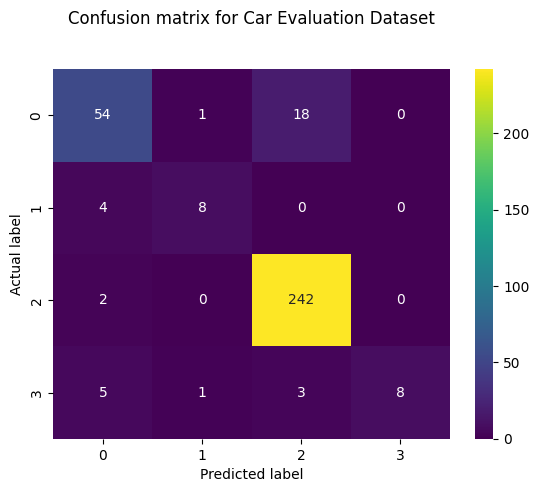

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix_car = confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix_car), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix for Car Evaluation Dataset', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        73
           1       0.80      0.67      0.73        12
           2       0.92      0.99      0.95       244
           3       1.00      0.47      0.64        17

    accuracy                           0.90       346
   macro avg       0.89      0.72      0.78       346
weighted avg       0.90      0.90      0.89       346



## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

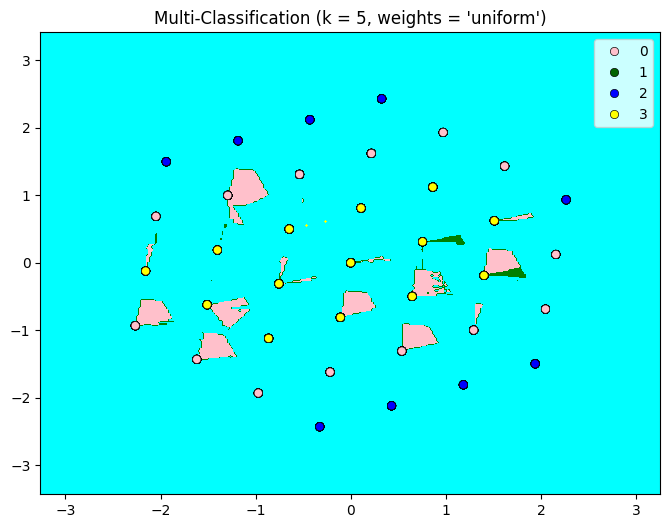

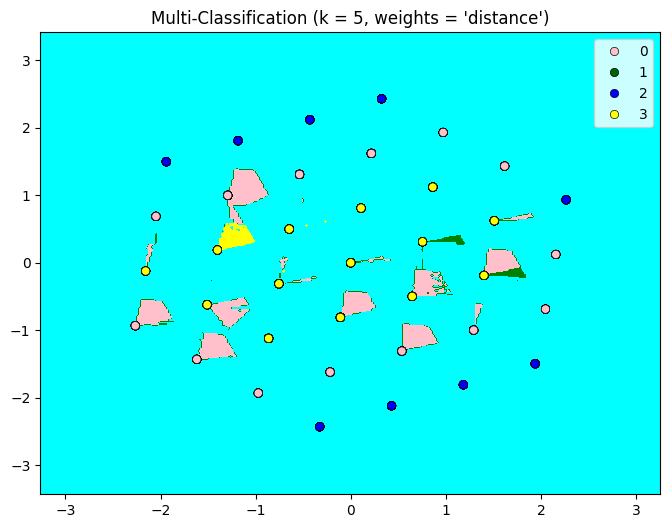

In [28]:
from sklearn.decomposition import PCA

pca_car = PCA(n_components=2)
X_car_pca = pca_car.fit_transform(X)
decision_boundary_plot(X_car_pca, y, 5)

### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to
'distance'. Find out the difference between these two.  

Ans:
- weights='uniform'
 - **Meaning:** All k neighbors contribute equally to the prediction. Each neighbor gets the same "vote" regardless of how close or far it is from the query point. The predicted class is simply the most common class among the k neighbors.

  - **Effect:** Works fine when data is well-separated and evenly spaced.Can be less accurate if closer points should be trusted more than farther points.

- weights='distance'
 - **Meaning:** Closer neighbors get more influence in the decision than farther ones. Each neighbor’s vote is weighted by the inverse of its distance Far-away neighbors have very little say in the final decision.

 - **Effect:** Often improves accuracy when nearby points are more likely to be correct indicators. Helps in situations where the density of points is uneven.

---

2. What do you think could be the drawbacks of using KNN ?

Ans:
1. **Slow with large datasets** – Needs to compare the query point to *all* training points every time.
2. **Memory-heavy** – Must store the entire dataset.
3. **Sensitive to irrelevant features** – Unimportant or noisy features can hurt accuracy.
4. **Affected by scaling** – Features with larger ranges can dominate distance calculations unless normalized.
5. **Struggles with high dimensions** – The “curse of dimensionality” makes distances less meaningful.
6. **Sensitive to outliers** – Far-off points can still influence results, especially with `uniform` weights.